### Project  - Data Wrangling of twitter account  (WeRateDogs) ###  

The aim of this project is to wrangle a dataset of twitter account named  (WeRateDogs)  then analyze ans visualize it the clean data. 


Table of contents

1. Gathering data
2. Assessing data
3. Cleaning data
4. Storing data
5. Analyzing, and visualizing data
6. Reporting



software and  libraries requirements 
We need to install either python or anaconda (Jupyter Notebook) with following packages:
pandas
NumPy
requests
tweepy
json

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import requests
import tweepy
from tweepy import OAuthHandler
import json
%matplotlib inline 
import seaborn as sns

from timeit import default_timer as timer


## Gathering ##


1a.twitter_archive_enhanced


In [2]:
#load twitter_archive_enhanced.csv
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


1b.image_prediction.tsv

In [3]:
#load tsv file
#getting the URL
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)

#View raw data
response.content

#Save the tsv file to the computer

with open ('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
image_predict = pd.read_csv('image-predictions.tsv',sep="\t")

#Lets Test
image_predict.head(10)



,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


1c.tweet_json.txt

In [4]:
tweets_list=[]
with open ('tweet_json.txt')as f:
    for line in f:
        tweets_list.append(json.loads(line))
json_data=pd.DataFrame(tweets_list,columns=['id','retweet_count','favorite_count'])


In [5]:
json_data.head(10)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


## Assessing ##

Visual assessing

In [6]:
twitter_archive.head(100)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
96,873580283840344065,NaN,NaN,2017-06-10 16:39:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We usually don't rate Deck-bound Saskatoon Bla...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/873580283...,13,10,None,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [7]:
image_predict.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [8]:
json_data.head(10)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


programatic assessing

In [9]:
twitter_archive.shape

(2356, 17)

In [10]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
twitter_archive.duplicated().sum()

0

In [12]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [15]:
json_data.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [16]:
image_predict.shape

(2075, 12)

In [17]:
sum(image_predict['jpg_url'].duplicated())

66

In [18]:
twitter_archive.name.value_counts().head(60)


None        745
a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Tucker       10
Penny        10
Lola         10
Winston       9
Bo            9
Sadie         8
the           8
Daisy         7
Buddy         7
Toby          7
an            7
Bailey        7
Leo           6
Oscar         6
Stanley       6
Rusty         6
Bella         6
Dave          6
Jack          6
Koda          6
Scout         6
Jax           6
Milo          6
Louis         5
Phil          5
Sammy         5
Gus           5
Chester       5
Alfie         5
Sunny         5
Bentley       5
very          5
Oakley        5
Finn          5
George        5
Larry         5
Clarence      4
Loki          4
Walter        4
Reggie        4
Hank          4
Scooter       4
Duke          4
quite         4
Reginald      4
Maggie        4
Luna          4
Maddie        4
Dexter        4
Jerry         4
Carl          4
Ruby          4
Riley         4
Clark         4
Name: name, dtype: int64

## Cleaning ##

In [19]:
#make a copy of the three collected dataframes for cleaning phase
twitter_archive_clean = twitter_archive.copy()
image_predict_clean = image_predict.copy()
json_data_clean = json_data.copy()

**Define**

Tidiness issue: rename id in json-data to tweet_id

**code**

In [20]:
json_data_clean.rename(columns = {'id':'tweet_id'}, inplace = True)


**test**

In [21]:
json_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [22]:
#merge tweets_data_clean with twitter_clean
twitter_archive_clean= pd.merge(twitter_archive_clean, json_data_clean, 
                         on = 'tweet_id', how = 'left')

In [23]:
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,8853.0,39467.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,6514.0,33819.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,4328.0,25461.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,8964.0,42908.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,9774.0,41048.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None,41.0,111.0
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None,147.0,311.0
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None,47.0,128.0
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None,48.0,132.0


**Define** 

Quality issue:redundant retweets rows

**code**

In [24]:
# only orignal tweets will be kept (no retweets)
twitter_clean= twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

# drop retweet related columns
twitter_clean = twitter_clean.drop(['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], 
                       axis=1)

**Test**

In [25]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
 14  retweet_count          2175 non-null   float64
 15  favo

**Define** 

Quality issue:redundant reply rows

In [26]:
# only orignal tweets will be kept (no retweets)
twitter_clean= twitter_clean[twitter_clean['in_reply_to_status_id'].isnull()]

# drop reply related columns
twitter_clean = twitter_clean.drop(['in_reply_to_user_id', 
                       'in_reply_to_status_id'], 
                       axis=1)



**test**

In [27]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2097 non-null   int64  
 1   timestamp           2097 non-null   object 
 2   source              2097 non-null   object 
 3   text                2097 non-null   object 
 4   expanded_urls       2094 non-null   object 
 5   rating_numerator    2097 non-null   int64  
 6   rating_denominator  2097 non-null   int64  
 7   name                2097 non-null   object 
 8   doggo               2097 non-null   object 
 9   floofer             2097 non-null   object 
 10  pupper              2097 non-null   object 
 11  puppo               2097 non-null   object 
 12  retweet_count       2097 non-null   float64
 13  favorite_count      2097 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 245.7+ KB


**Define**

Quality issue:change dtype of twitter_id and id to string 

In [28]:
twitter_clean['tweet_id'] = twitter_clean['tweet_id'].astype(str)

In [29]:
image_predict_clean['tweet_id'] = image_predict_clean['tweet_id'].astype(str)

In [30]:
image_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [31]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2097 non-null   object 
 1   timestamp           2097 non-null   object 
 2   source              2097 non-null   object 
 3   text                2097 non-null   object 
 4   expanded_urls       2094 non-null   object 
 5   rating_numerator    2097 non-null   int64  
 6   rating_denominator  2097 non-null   int64  
 7   name                2097 non-null   object 
 8   doggo               2097 non-null   object 
 9   floofer             2097 non-null   object 
 10  pupper              2097 non-null   object 
 11  puppo               2097 non-null   object 
 12  retweet_count       2097 non-null   float64
 13  favorite_count      2097 non-null   float64
dtypes: float64(2), int64(2), object(10)
memory usage: 245.7+ KB


**Define**

Quality issue:change dtype of timestamp time

**code**

In [32]:
# change the 'timestamp' column to a datetime 
twitter_clean['timestamp'] = pd.to_datetime(twitter_clean['timestamp'])

**test**

In [33]:
twitter_clean['timestamp'].dtype

datetime64[ns, UTC]

In [34]:
#test if there is a data before August 1st, 2017 
twitter_clean = twitter_clean[twitter_clean['timestamp'] <= '2017-08-01']

In [35]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095 entries, 2 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2095 non-null   object             
 1   timestamp           2095 non-null   datetime64[ns, UTC]
 2   source              2095 non-null   object             
 3   text                2095 non-null   object             
 4   expanded_urls       2092 non-null   object             
 5   rating_numerator    2095 non-null   int64              
 6   rating_denominator  2095 non-null   int64              
 7   name                2095 non-null   object             
 8   doggo               2095 non-null   object             
 9   floofer             2095 non-null   object             
 10  pupper              2095 non-null   object             
 11  puppo               2095 non-null   object             
 12  retweet_count       2095 non-null 

**Define**

Quality issue:Wrong names and 'None' name

**code**

In [36]:
# find names that start with a lowercase letter and put them in list
low_names = []
for l in twitter_clean['name']:
    if l[0].islower() and l not in low_names:
        low_names.append(l)
        
print(low_names)


['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [37]:
# replace previously names start with a lowercase letter with 'NaN'
twitter_clean['name'].replace(low_names, np.nan, inplace = True)

# Also replace 'None' with NaN
twitter_clean['name'].replace('None', np.nan, inplace = True)

**test**

In [38]:
low_names[0] in twitter_clean['name']


False

In [39]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095 entries, 2 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2095 non-null   object             
 1   timestamp           2095 non-null   datetime64[ns, UTC]
 2   source              2095 non-null   object             
 3   text                2095 non-null   object             
 4   expanded_urls       2092 non-null   object             
 5   rating_numerator    2095 non-null   int64              
 6   rating_denominator  2095 non-null   int64              
 7   name                1388 non-null   object             
 8   doggo               2095 non-null   object             
 9   floofer             2095 non-null   object             
 10  pupper              2095 non-null   object             
 11  puppo               2095 non-null   object             
 12  retweet_count       2095 non-null 

In [40]:
twitter_clean.name.value_counts().head(60)


Lucy        11
Charlie     11
Cooper      10
Oliver      10
Penny        9
Tucker       9
Lola         8
Winston      8
Sadie        8
Toby         7
Daisy        7
Koda         6
Stanley      6
Bailey       6
Bo           6
Jax          6
Bella        6
Oscar        6
Dave         5
Scout        5
Buddy        5
Leo          5
Bentley      5
Louis        5
Chester      5
Rusty        5
Milo         5
Archie       4
Chip         4
Alfie        4
Brody        4
Reggie       4
Derek        4
Scooter      4
Finn         4
Sammy        4
Duke         4
Boomer       4
Clarence     4
Jerry        4
Maggie       4
Phil         4
Jack         4
Sophie       4
Bear         4
Winnie       4
Clark        4
Larry        4
Jeffrey      4
Gus          4
Oakley       4
George       4
Dexter       4
Gary         4
Cassie       4
Malcolm      3
Olive        3
Loki         3
Wyatt        3
Otis         3
Name: name, dtype: int64

**Define**

Quality issue : replace (_) with () in p1,p2and p3

**code**

In [41]:
# replace underscores with spaces in image_prediction_clean(p1, p2, and p3)
image_predict_clean['p1'].replace('_', ' ',  inplace = True)
image_predict_clean['p2'].replace('_', ' ',  inplace = True)
image_predict_clean['p3'].replace('_', ' ',  inplace = True)

**test**

In [42]:
image_predict_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [43]:
image_predict_clean['p1']

0       Welsh_springer_spaniel
1                      redbone
2              German_shepherd
3          Rhodesian_ridgeback
4           miniature_pinscher
                 ...          
2070                    basset
2071               paper_towel
2072                 Chihuahua
2073                 Chihuahua
2074                    orange
Name: p1, Length: 2075, dtype: object

**Define**

Tidiness issue : merge the whole stages to one column stage then delete them

**code**

In [44]:
#first create stage column as none then combine stage columns
twitter_clean['stage']=None
twitter_clean['stage'] = twitter_clean.doggo + twitter_clean.floofer + twitter_clean.pupper + twitter_clean.puppo

In [45]:
twitter_clean['stage'].value_counts()

NoneNoneNoneNone        1759
NoneNonepupperNone       221
doggoNoneNoneNone         72
NoneNoneNonepuppo         23
NoneflooferNoneNone        9
doggoNonepupperNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: stage, dtype: int64

In [46]:
#then we split the combined stage and replace none with space
twitter_clean['stage'] = twitter_clean['stage'].map(lambda x: x.replace("None",""))


In [47]:
twitter_clean['stage'].value_counts()

                1759
pupper           221
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: stage, dtype: int64

In [48]:
#after that we split the combined stage by comma
twitter_clean.loc[twitter_clean.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
twitter_clean.loc[twitter_clean.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
twitter_clean.loc[twitter_clean.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

In [49]:
twitter_clean['stage'].value_counts()

                  1759
pupper             221
doggo               72
puppo               23
floofer              9
doggo, pupper        9
doggo, puppo         1
doggo, floofer       1
Name: stage, dtype: int64

In [50]:
#drop the old stages
twitter_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis =1, inplace=True)


#  Use nan to fill the empty spaces
twitter_clean['stage'] = twitter_clean['stage'].replace('', np.nan)


**test**

In [51]:
twitter_clean['stage'].value_counts()

pupper            221
doggo              72
puppo              23
floofer             9
doggo, pupper       9
doggo, puppo        1
doggo, floofer      1
Name: stage, dtype: int64

In [52]:
twitter_clean.tail(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,stage
2346,666058600524156928,2015-11-16 01:01:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,https://twitter.com/dog_rates/status/666058600...,8,10,NaN,61.0,115.0,NaN
2347,666057090499244032,2015-11-16 00:55:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,https://twitter.com/dog_rates/status/666057090...,9,10,NaN,146.0,304.0,NaN
2348,666055525042405380,2015-11-16 00:49:46+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,https://twitter.com/dog_rates/status/666055525...,10,10,NaN,261.0,448.0,NaN
2349,666051853826850816,2015-11-16 00:35:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,https://twitter.com/dog_rates/status/666051853...,2,10,NaN,879.0,1253.0,NaN
2350,666050758794694657,2015-11-16 00:30:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,https://twitter.com/dog_rates/status/666050758...,10,10,NaN,60.0,136.0,NaN
2351,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,41.0,111.0,NaN
2352,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,147.0,311.0,NaN
2353,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,47.0,128.0,NaN
2354,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,48.0,132.0,NaN
2355,666020888022790149,2015-11-15 22:32:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,532.0,2535.0,NaN


In [53]:
twitter_clean.shape

(2095, 11)

**Define**

Quality issue:extracted exact source 

**code**

In [54]:
twitter_clean['source'] = twitter_clean['source'].str.extract('^<a.+>(.+)</a>$')

**test**

In [55]:
twitter_clean.source.value_counts()

Twitter for iPhone     1962
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

In [56]:
twitter_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,stage
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,4328.0,25461.0,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,8964.0,42908.0,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,9774.0,41048.0,NaN
5,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,3261.0,20562.0,NaN
6,890971913173991426,2017-07-28 16:27:12+00:00,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,2158.0,12041.0,NaN


In [57]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095 entries, 2 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2095 non-null   object             
 1   timestamp           2095 non-null   datetime64[ns, UTC]
 2   source              2095 non-null   object             
 3   text                2095 non-null   object             
 4   expanded_urls       2092 non-null   object             
 5   rating_numerator    2095 non-null   int64              
 6   rating_denominator  2095 non-null   int64              
 7   name                1388 non-null   object             
 8   retweet_count       2095 non-null   float64            
 9   favorite_count      2095 non-null   float64            
 10  stage               336 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(2), object(6)
memory usage: 260.9+ KB


**Define**

Quality issue: correct the numerator

**code**

In [58]:
decimal = twitter_clean[twitter_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
print(decimal[['tweet_id','rating_numerator', 'text']].values)

[['883482846933004288' 5
  'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948']
 ['786709082849828864' 75
  "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"]
 ['778027034220126208' 27
  "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"]
 ['680494726643068929' 26
  'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']]


C:\Users\Sara\AppData\Local\Temp\ipykernel_3440\339198252.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  decimal = twitter_clean[twitter_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]


In [59]:
twitter_clean.loc[1712,'text']

'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'

In [60]:
twitter_clean.loc[1712 , 'rating_numerator'] = 11.26
twitter_clean.loc[1712 , 'rating_denominator'] = 10



In [61]:
twitter_clean.loc[1712,:]

tweet_id                                             680494726643068929
timestamp                                     2015-12-25 21:06:00+00:00
source                                               Twitter for iPhone
text                  Here we have uncovered an entire battalion of ...
expanded_urls         https://twitter.com/dog_rates/status/680494726...
rating_numerator                                                  11.26
rating_denominator                                                   10
name                                                                NaN
retweet_count                                                     542.0
favorite_count                                                   1879.0
stage                                                               NaN
Name: 1712, dtype: object

In [62]:
twitter_clean.loc[763,'text']

"This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"

In [63]:
twitter_clean.loc[763 , 'rating_numerator'] = 11.27


In [64]:
twitter_clean.loc[763,:]

tweet_id                                             778027034220126208
timestamp                                     2016-09-20 00:24:34+00:00
source                                               Twitter for iPhone
text                  This is Sophie. She's a Jubilant Bush Pupper. ...
expanded_urls         https://twitter.com/dog_rates/status/778027034...
rating_numerator                                                  11.27
rating_denominator                                                   10
name                                                             Sophie
retweet_count                                                    1885.0
favorite_count                                                   7320.0
stage                                                            pupper
Name: 763, dtype: object

In [65]:
twitter_clean.loc[45,'text']

'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'

In [66]:
twitter_clean.loc[45 , 'rating_numerator'] = 13.5
twitter_clean.loc[45 , 'rating_denominator'] = 10

In [67]:
twitter_clean.loc[45,:]

tweet_id                                             883482846933004288
timestamp                                     2017-07-08 00:28:19+00:00
source                                               Twitter for iPhone
text                  This is Bella. She hopes her smile made you sm...
expanded_urls         https://twitter.com/dog_rates/status/883482846...
rating_numerator                                                   13.5
rating_denominator                                                   10
name                                                              Bella
retweet_count                                                   10407.0
favorite_count                                                  46860.0
stage                                                               NaN
Name: 45, dtype: object

In [68]:
twitter_clean.loc[695,'text']

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

In [69]:
twitter_clean.loc[695 , 'rating_numerator'] = 9.75

In [70]:
twitter_clean.loc[695,:]

tweet_id                                             786709082849828864
timestamp                                     2016-10-13 23:23:56+00:00
source                                               Twitter for iPhone
text                  This is Logan, the Chow who lived. He solemnly...
expanded_urls         https://twitter.com/dog_rates/status/786709082...
rating_numerator                                                   9.75
rating_denominator                                                   10
name                                                              Logan
retweet_count                                                    7069.0
favorite_count                                                  20296.0
stage                                                               NaN
Name: 695, dtype: object

In [71]:
twitter_clean.shape

(2095, 11)

In [72]:
wrong_numerator= twitter_clean[twitter_clean['rating_numerator'] >= 15].index

# Drop all tweets that have "rating_numerator" >=15 
twitter_clean.drop(wrong_numerator , inplace = True )

In [73]:
twitter_clean.shape

(2080, 11)

**test**

In [74]:
twitter_clean[twitter_clean['rating_numerator'] > 15]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,stage


**Define**

Quality issue:remove denomenator =! 10

**code**

In [75]:
twitter_clean[twitter_clean['rating_denominator'] != 10][['text','rating_numerator', 'rating_denominator' ]]

,text,rating_numerator,rating_denominator
1068,"After so many requests, this is Bretagne. She ...",9.0,11
1165,Happy 4/20 from the squad! 13/10 for all https...,4.0,20
1662,This is Darrel. He just robbed a 7/11 and is i...,7.0,11
2335,This is an Albanian 3 1/2 legged Episcopalian...,1.0,2


In [76]:
wrong_denom= twitter_clean[twitter_clean['rating_denominator'] != 10].index

# Drop all tweets that have "rating_denominator" != 10 
twitter_clean.drop(wrong_denom , inplace = True )

**test**

In [77]:
twitter_clean[twitter_clean['rating_denominator'] != 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,stage


**Define**

Quality issue:inconsistent of (p1,p2 and p3)in their capitalization

**code**

In [78]:
image_predict_clean['p1'] = image_predict_clean['p1'].str.lower()
image_predict_clean['p2'] = image_predict_clean['p2'].str.lower()
image_predict_clean['p3'] = image_predict_clean['p3'].str.lower()

**test**

In [79]:
image_predict_clean.p1.unique()
image_predict_clean.p2.unique()
image_predict_clean.p3.unique()

array(['shetland_sheepdog', 'rhodesian_ridgeback', 'bloodhound',
       'miniature_pinscher', 'doberman', 'greater_swiss_mountain_dog',
       'terrapin', 'fur_coat', 'golden_retriever',
       'soft-coated_wheaten_terrier', 'labrador_retriever', 'pekinese',
       'ibizan_hound', 'french_bulldog', 'malinois', 'dandie_dinmont',
       'borzoi', 'partridge', 'bookcase', 'basenji', 'miniature_poodle',
       'great_grey_owl', 'groenendael', 'eskimo_dog', 'hamster', 'briard',
       'papillon', 'flat-coated_retriever', 'gar', 'chihuahua',
       'shih-tzu', 'pomeranian', 'dingo', 'power_drill', 'saluki',
       'great_pyrenees', 'west_highland_white_terrier', 'collie',
       'toy_poodle', 'vizsla', 'acorn', 'giant_schnauzer', 'teddy',
       'common_iguana', 'wig', 'water_buffalo', 'coyote', 'seat_belt',
       'kelpie', 'space_heater', 'brabancon_griffon', 'standard_poodle',
       'beagle', 'irish_water_spaniel', 'bluetick', 'weimaraner',
       'chesapeake_bay_retriever', 'toilet_tiss

In [80]:
twitter_clean.shape

(2076, 11)

In [81]:
image_predict_clean.shape

(2075, 12)

In [82]:
# add new 'rating' column by dividing rating_numerator by rating_denominator
twitter_clean['rating'] = twitter_clean['rating_numerator'] / twitter_clean['rating_denominator']

In [83]:
twitter_clean['rating']

2       1.2
3       1.3
4       1.2
5       1.3
6       1.3
       ... 
2351    0.5
2352    0.6
2353    0.9
2354    0.7
2355    0.8
Name: rating, Length: 2076, dtype: float64

In [84]:
twitter_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,stage,rating
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,4328.0,25461.0,NaN,1.2
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,8964.0,42908.0,NaN,1.3
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,9774.0,41048.0,NaN,1.2
5,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,NaN,3261.0,20562.0,NaN,1.3
6,890971913173991426,2017-07-28 16:27:12+00:00,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10,Jax,2158.0,12041.0,NaN,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10,NaN,41.0,111.0,NaN,0.5
2352,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10,NaN,147.0,311.0,NaN,0.6
2353,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10,NaN,47.0,128.0,NaN,0.9
2354,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10,NaN,48.0,132.0,NaN,0.7


**Define**

Quality issue: remove tweet where all probabailites of p_dog are false

**code**

In [85]:
# Find tweet_id that are not dogs
true_dogs = image_predict_clean[(image_predict_clean["p1_dog"] == False) &
                     (image_predict_clean["p2_dog"] == False) &
                     (image_predict_clean["p3_dog"] == False)]["tweet_id"].index

# Remove tweets where all probabilities of p_dog are False
image_predict_clean.drop(true_dogs, inplace=True)

**test**

In [86]:
# Check there are no tweets where all probabilities of p_dog are False
assert len(image_predict_clean[(image_predict_clean["p1_dog"] == False) &
          (image_predict_clean["p2_dog"] == False) &
          (image_predict_clean["p3_dog"] == False)]) == 0

**Define**

Tidiness issue: merge the whole datasets to one dataframe

**code**

In [87]:
#merge the three datasets
twitter_clean= pd.merge(twitter_clean, image_predict_clean, 
                         on = 'tweet_id', how = 'left')

**test**

In [88]:
twitter_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2076 entries, 0 to 2075
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2076 non-null   object             
 1   timestamp           2076 non-null   datetime64[ns, UTC]
 2   source              2076 non-null   object             
 3   text                2076 non-null   object             
 4   expanded_urls       2073 non-null   object             
 5   rating_numerator    2076 non-null   float64            
 6   rating_denominator  2076 non-null   int64              
 7   name                1384 non-null   object             
 8   retweet_count       2076 non-null   float64            
 9   favorite_count      2076 non-null   float64            
 10  stage               336 non-null    object             
 11  rating              2076 non-null   float64            
 12  jpg_url             1649 non-null 

In [89]:
# remove expanded urls since its not necessary column
twitter_clean = twitter_clean.drop(['expanded_urls'], axis=1)


In [90]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2076 entries, 0 to 2075
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2076 non-null   object             
 1   timestamp           2076 non-null   datetime64[ns, UTC]
 2   source              2076 non-null   object             
 3   text                2076 non-null   object             
 4   rating_numerator    2076 non-null   float64            
 5   rating_denominator  2076 non-null   int64              
 6   name                1384 non-null   object             
 7   retweet_count       2076 non-null   float64            
 8   favorite_count      2076 non-null   float64            
 9   stage               336 non-null    object             
 10  rating              2076 non-null   float64            
 11  jpg_url             1649 non-null   object             
 12  img_num             1649 non-null 

## Storing ##

In [91]:
# Store cleaned data in the file twitter_archive_master.csv
twitter_clean.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing ##

In [92]:
#first we get the statistics 
data = twitter_clean.copy()
data.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,rating,img_num,p1_conf,p2_conf,p3_conf
count,2076.000000,2076.0,2076.000000,2076.000000,2076.000000,1649.000000,1649.000000,1649.000000,1.649000e+03
mean,10.608276,10.0,2838.117534,8977.551060,1.060828,1.214676,0.605535,0.137751,6.120135e-02
std,2.149631,0.0,4718.417254,12212.628718,0.214963,0.574543,0.266530,0.101764,5.178564e-02
min,0.000000,10.0,16.000000,81.000000,0.000000,1.000000,0.044333,0.000010,2.160900e-07
25%,10.000000,10.0,640.250000,2040.750000,1.000000,1.000000,0.379055,0.054790,1.553510e-02
50%,11.000000,10.0,1399.500000,4191.500000,1.100000,1.000000,0.606654,0.121607,4.990060e-02
75%,12.000000,10.0,3285.000000,11425.000000,1.200000,1.000000,0.852088,0.199544,9.469160e-02
max,14.000000,10.0,79515.000000,132810.000000,1.400000,4.000000,0.999984,0.467678,2.710420e-01


In [95]:
#find the highest like and retweet
like_max = np.max(data['favorite_count'])
ret_max  = np.max(data['retweet_count'])

like = data[data.favorite_count == like_max].index[0]
ret  = data[data.retweet_count == ret_max].index[0]

# Max Likes
print("The highest favorited tweet is \n{}".format(data['text'][like]))
print("With maximun number of favorites {}\n".format(like_max))

# Max Retweets
print("The highest retweeted tweet is \n{}".format(data['text'][ret]))
print("With maximun number of retweets {}".format(ret_max))

The highest favorited tweet is 
Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc
With maximun number of favorites 132810.0

The highest retweeted tweet is 
Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4
With maximun number of retweets 79515.0


In [96]:
#find the lowest like and retweet

like_min = np.min(data['favorite_count'])
ret_min  = np.min(data['retweet_count'])

like = data[data.favorite_count == like_min].index[0]
ret  = data[data.retweet_count == ret_min].index[0]

# Min Likes
print("The lowest favorited tweet is \n{}".format(data['text'][like]))
print("With minimun number of favorites {}\n".format(like_min))

# Min Retweets
print("The lowest retweeted tweet is \n{}".format(data['text'][ret]))
print("With minimun number of retweets {}".format(ret_min))

The lowest favorited tweet is 
Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10 https://t.co/11LvqN4WLq
With minimun number of favorites 81.0

The lowest retweeted tweet is 
Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10 https://t.co/11LvqN4WLq
With minimun number of retweets 16.0


### Most common breeds ###

In [97]:
# Find what the algorithm has found as the top dog breed
data['p1'].value_counts()



golden_retriever            134
labrador_retriever           91
pembroke                     88
chihuahua                    77
pug                          54
                           ... 
cup                           1
rapeseed                      1
sulphur-crested_cockatoo      1
conch                         1
hay                           1
Name: p1, Length: 214, dtype: int64

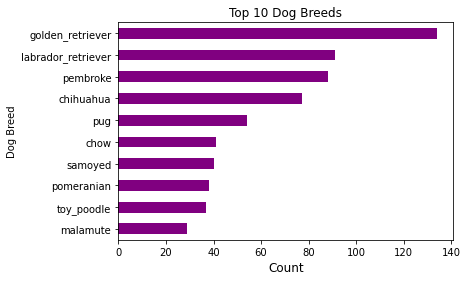

In [98]:
# Plot the top 10 predicted dog breeds
data['p1'].value_counts()[0:10].sort_values(ascending=True).plot(kind='barh' , color ='purple')
plt.title('Top 10 Dog Breeds' , size=12)
plt.xlabel('Count', size=12)
plt.ylabel('Dog Breed')
plt.show();


### Relation between favourite and retweet ###

In [99]:
data.corr()

,rating_numerator,rating_denominator,retweet_count,favorite_count,rating,img_num,p1_conf,p2_conf,p3_conf
rating_numerator,1.000000,NaN,0.313134,0.412629,1.000000,0.180434,0.111599,0.003819,-0.046185
rating_denominator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweet_count,0.313134,NaN,1.000000,0.911795,0.313134,0.092894,0.060489,-0.020293,-0.046682
favorite_count,0.412629,NaN,0.911795,1.000000,0.412629,0.124735,0.085686,-0.022712,-0.056346
rating,1.000000,NaN,0.313134,0.412629,1.000000,0.180434,0.111599,0.003819,-0.046185
img_num,0.180434,NaN,0.092894,0.124735,0.180434,1.000000,0.213662,-0.175373,-0.141374
p1_conf,0.111599,NaN,0.060489,0.085686,0.111599,0.213662,1.000000,-0.540568,-0.733262
p2_conf,0.003819,NaN,-0.020293,-0.022712,0.003819,-0.175373,-0.540568,1.000000,0.476746
p3_conf,-0.046185,NaN,-0.046682,-0.056346,-0.046185,-0.141374,-0.733262,0.476746,1.000000


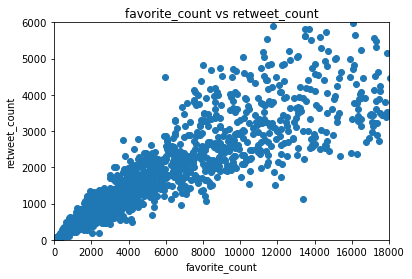

In [100]:
plt.scatter(data.favorite_count,data.retweet_count);
plt.xlim(0, 18000);
plt.ylim(0, 6000);
plt.xlabel('favorite_count');
plt.ylabel('retweet_count');
plt.title('favorite_count vs retweet_count');


### Rating Vs Retweet count ###

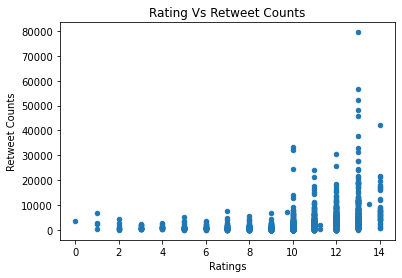

In [101]:
# rating Vs retweet counts
data.plot(x='rating_numerator',y='retweet_count',kind='scatter');
plt.xlabel('Ratings')
plt.ylabel('Retweet Counts')
plt.title('Rating Vs Retweet Counts');

### Rating Vs Favorite count ###

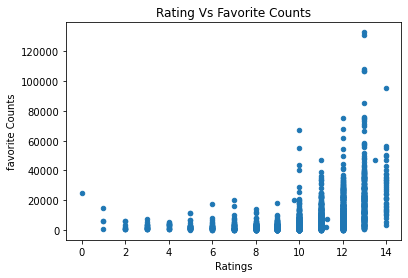

In [102]:
# rating Vs favorite counts
data.plot(x='rating_numerator',y='favorite_count',kind='scatter');
plt.xlabel('Ratings')
plt.ylabel('favorite Counts')
plt.title('Rating Vs Favorite Counts');


### Most common dog stage ###

In [103]:
x=data['stage'].value_counts()
x

pupper            221
doggo              72
puppo              23
floofer             9
doggo, pupper       9
doggo, puppo        1
doggo, floofer      1
Name: stage, dtype: int64

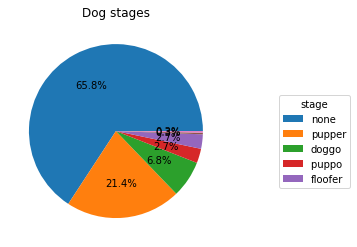

In [105]:
plt.pie(data.stage.value_counts(),autopct='%1.1f%%');
plt.legend(['none','pupper','doggo','puppo ','floofer'],title="stage",
          loc="right",bbox_to_anchor=(1, 0, 0.6,0.9));
plt.title('Dog stages');

Pupper is the First one 
Floofer is the last one

### Most common dog name? ###

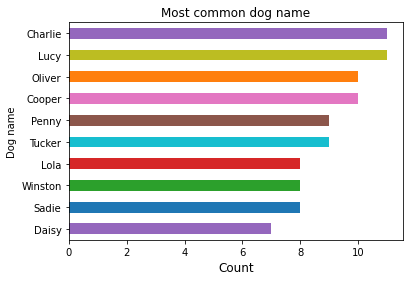

In [106]:
colors = ['#9467bd','#1f77b4', '#2ca02c', '#d62728', '#17becf' ,'#8c564b', '#e377c2', '#ff7f0e', '#bcbd22']
names = data['name'].value_counts()[:10].sort_values(ascending=True).plot(kind='barh' , color =colors)

plt.title('Most common dog name' , size=12)
plt.xlabel('Count', size=12)
plt.ylabel('Dog name')
plt.show();

The most common dog names are Charlie, Cooper, and Oliver.

### Dog stages with  highest  favorite counts ###

In [107]:
nonull_stage = data[data["stage"].isnull()==False]


In [108]:
dog_stages = nonull_stage.query('stage=="pupper" or stage=="doggo" or stage=="puppo" or stage=="floofer"')
fav_count_stage = pd.DataFrame(dog_stages.groupby('stage').favorite_count.mean().sort_values())


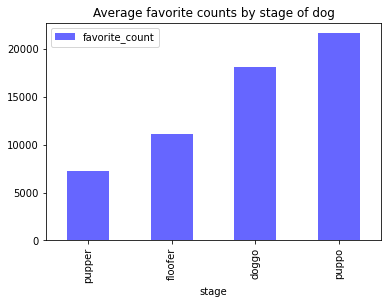

In [113]:
fav_count_stage['stage'] = fav_count_stage.index
fav_count_stage.plot(x="stage",y='favorite_count',kind='bar',title="Average favorite counts by stage of dog",color='b', alpha=0.6);

### Average rating by dog stages ###


C:\Users\Sara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


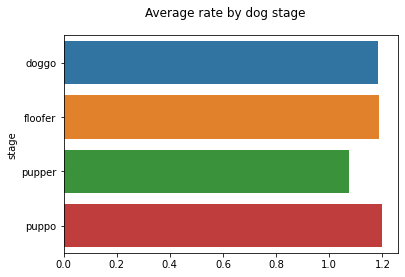

In [110]:
dog_stage_rating = dog_stages.groupby('stage')['rating'].mean()
sns.barplot(dog_stage_rating.values, dog_stage_rating.index)
plt.suptitle('Average rate by dog stage');

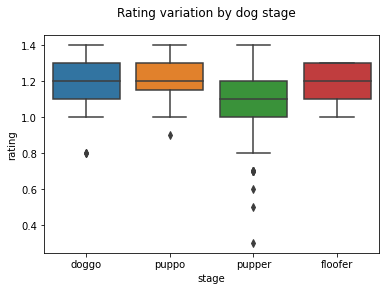

In [111]:
dog_stage = nonull_stage.query('stage=="pupper" or stage=="doggo" or stage=="puppo" or stage=="floofer"')
sns.boxplot(data=dog_stages, y='rating', x='stage')
plt.suptitle('Rating variation by dog stage');